<img src="./img/p3/portada.png" />

# Codigo <a id='codigo'></a>

|||||||||||||||||||||||||||||KNN||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados KNN ('0diabetes.arff'): 75.0 %
Patron a clasificar del dataset(208)

Clase predicha KNN
b'tested_negative'
----------------
Mejores valores hiperparametros KNN: {'n_neighbors': 7}
|||||||||||||||||||||||||||||SVM||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados SVM ('0diabetes.arff'): 67.1875 %
Patron a clasificar del dataset(208)

Clase predicha KNN
b'tested_negative'
----------------
|||||||||||||||||||||||||||||DTC||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados DTC ('0diabetes.arff'): 63.020833333333336 %
Patron a clasificar del dataset(208)

Clase predicha KNN
b'tested_negative'
----------------
|||||||||||||||||||||||||||||KNN||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados KNN ('1glass.arff'): 61.111111111111114 %
Patron a clasificar del dataset(154)

Clase predicha KNN
b'build wind float'
----------------
Mejores valores

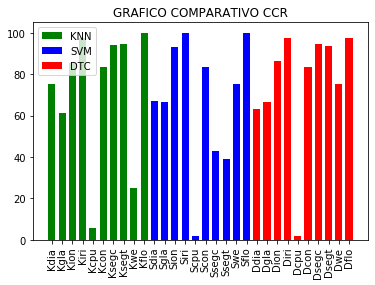





----------------------------GRAFICO COMPARATIVO ERROR----------------------------


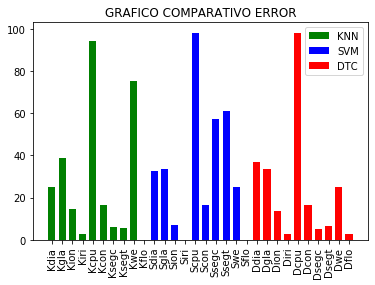





Test de Wilcoxon KNN vs SVM value: WilcoxonResult(statistic=15.0, pvalue=0.6744240722352938)


Test de Wilcoxon KNN vs DTC value: WilcoxonResult(statistic=18.0, pvalue=1.0)


Test de Wilcoxon SVM vs DTC value: WilcoxonResult(statistic=10.0, pvalue=0.9162824413291019)




Rango de Friedman KNN
[ 4.  3.  6.  9.  1.  5.  7.  8.  2. 10.]


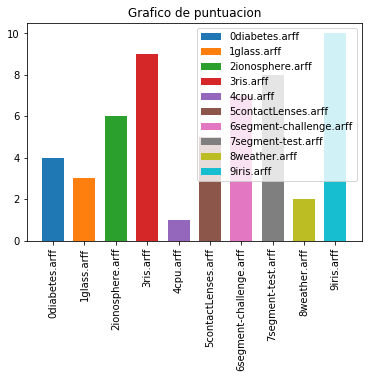



Rango de Friedman SVM
[5.  4.  8.  9.5 1.  7.  3.  2.  6.  9.5]


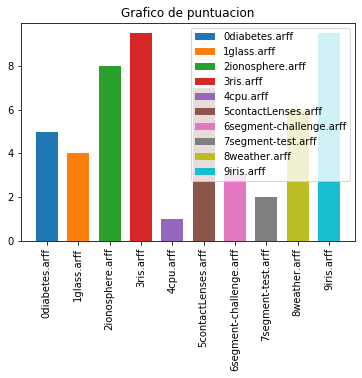



Rango de Friedman DTC
[2.  3.  6.  9.5 1.  5.  8.  7.  4.  9.5]


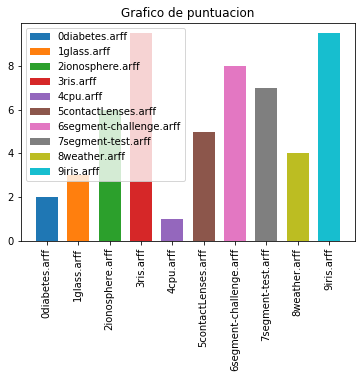





Test de Iman Davenport
No hay diferencias significativas
Valor de F: 0.1176470588235311 , valor de RESULT: 0.1260375144602539




CCR de las instancias: ['0diabetes.arff', '1glass.arff', '2ionosphere.arff', '3ris.arff', '4cpu.arff', '5contactLenses.arff', '6segment-challenge.arff', '7segment-test.arff', '8weather.arff', '9iris.arff']
     0               1            2                 3          4          5                    6                        7                   8              9          10
0  ---  0diabetes.arff  1glass.arff  2ionosphere.arff  3ris.arff  4cpu.arff  5contactLenses.arff  6segment-challenge.arff  7segment-test.arff  8weather.arff  9iris.arff
1  KNN              75      61.1111           85.2273    97.3684    5.66038              83.3333                  93.8667             94.5813             25         100
2  SVM         67.1875      66.6667           93.1818        100    1.88679              83.3333                  42.9333             38.9163            

In [9]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.metrics import mean_squared_error
import pydotplus
import ipywidgets as widgets
from scipy.io import arff
import pandas as pd
from os import listdir
import random
from scipy.stats import wilcoxon,rankdata,f,friedmanchisquare

import warnings
warnings.filterwarnings('ignore')

KNN_PARAM = [{
                    'n_neighbors':(1,2,3,4,5,6,7)
                    }]
optimo_KNN = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=KNN_PARAM, n_jobs=-1, cv=5)

def wilcoxonTest(arrayX,arrayY,text):
    print('Test de Wilcoxon '+text+' value: '+str(wilcoxon(arrayX,arrayY)))

def predecir(aux,clasificador):
    array = clasificador.predict([aux])
    print('Clase predicha KNN')
    print(target[1][array][0])
    print('----------------')
    
def pintarGraficoFriedman(lista_dataset,ranking):
    plt.figure(u'Gráfica de barras')  # Figure
    
    for i in range(0,10):
         plt.bar(lista_dataset[i],ranking[i] , width=0.7, align='center')
   
    plt.xticks(rotation='vertical')
    plt.legend(lista_dataset)
    plt.title('Grafico de puntuacion')
    plt.show()
    
def pintarGraficos(matrix,titulo):
    fig = plt.figure(u'Gráfica de barras')  # Figure
    ax = fig.add_subplot(111)  # Axes

    x1 = ['Kdia', 'Kgla', 'Kion', 'Kiri','Kcpu','Kcon', 'Ksegc','Ksegt','Kwe','Kflo']
    x2 = ['Sdia', 'Sgla', 'Sion', 'Siri','Scpu','Scon', 'Ssegc','Ssegt','Swe','Sflo']
    x3 = ['Ddia', 'Dgla', 'Dion', 'Diri','Dcpu','Dcon', 'Dsegc','Dsegt','Dwe','Dflo']
    y1 = []
    y2 = []
    y3 = []
    for columna in range(1, len(lista_datasets) + 1):
        y1.append(matrix[1][columna])
        y2.append(matrix[2][columna])
        y3.append(matrix[3][columna])

    plt.bar(x1, y1, color='g', width=0.7, align='center')
    plt.bar(x2, y2, color='b', width=0.7, align='center')
    plt.bar(x3, y3, color='r', width=0.7, align='center')
    plt.xticks(rotation='vertical')
    plt.legend(['KNN', 'SVM', 'DTC'])
    plt.title(titulo)
    plt.show()
    print('\n\n\n')

#MAIN
matrix_ccr   = [['---',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['KNN',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['SVM',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['DTC',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
matrix_error = [['---',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['KNN',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['SVM',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['DTC',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
lista_datasets = listdir('./data/p3/datasets/')
##Montar la matriz de CCR


c = 1
for i in lista_datasets:
    matrix_ccr[0][c] = i
    matrix_error[0][c] = i
    c = c + 1


lista_datasets = listdir('./data/p3/datasets/')
AUX = 1
for indice in lista_datasets:

    dataset = arff.loadarff('./data/p3/datasets/'+str(indice))
    df = pd.DataFrame(dataset[0])
    target = pd.factorize(df['class'])
    X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:, df.columns != 'class'],target[0], test_size=0.25)

    indice_aleatorio = random.randint(1, df.shape[0])
    patron_aleatorio = df.iloc[indice_aleatorio, df.columns != 'class']

    #Llamada y entrenamiento del algoritmo KNN
    print('|||||||||||||||||||||||||||||KNN||||||||||||||||||||||||||||||||||||')
    
    optimo_KNN.fit(X_train,Y_train)
    print('Porcentaje de bien clasificados KNN (\''+str(indice)+'\'): '+str(optimo_KNN.score(X_test,Y_test)*100)+' %')
    print('Patron a clasificar del dataset('+str(indice_aleatorio)+')\n')
    matrix_ccr[1][AUX] = round(optimo_KNN.score(X_test,Y_test),10)*100
    matrix_error[1][AUX] = round(100 - matrix_ccr[1][AUX],10)
    predecir(patron_aleatorio,optimo_KNN)
    print('Mejores valores hiperparametros KNN: '+str(optimo_KNN.best_params_))

    #Llamada y entrenamiento algoritmo SVM
    print('|||||||||||||||||||||||||||||SVM||||||||||||||||||||||||||||||||||||')
    svm = SVC()
    svm.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados SVM (\''+str(indice)+'\'): '+str(svm.score(X_test,Y_test)*100)+' %')
    print('Patron a clasificar del dataset(' + str(indice_aleatorio) + ')\n')
    matrix_ccr[2][AUX] = round(svm.score(X_test,Y_test),10)*100
    matrix_error[2][AUX] = round(100 - matrix_ccr[2][AUX],10)
    predecir(patron_aleatorio,svm)

    # Llamada y entrenamiento algoritmo DTC
    print('|||||||||||||||||||||||||||||DTC||||||||||||||||||||||||||||||||||||')
    dtc=DecisionTreeClassifier()
    dtc.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados DTC (\'' + str(indice) + '\'): ' + str(dtc.score(X_test, Y_test) * 100) + ' %')
    print('Patron a clasificar del dataset(' + str(indice_aleatorio) + ')\n')
    matrix_ccr[3][AUX] = round(dtc.score(X_test,Y_test),10)*100
    matrix_error[3][AUX] = round(100 - matrix_ccr[3][AUX],10)
    predecir(patron_aleatorio, dtc)
    AUX = AUX + 1





print('----------------------------GRAFICO COMPARATIVO CCR----------------------------')
pintarGraficos(matrix_ccr,'GRAFICO COMPARATIVO CCR')

print('----------------------------GRAFICO COMPARATIVO ERROR----------------------------')
pintarGraficos(matrix_error,'GRAFICO COMPARATIVO ERROR')

matrix_ccr = pd.DataFrame(matrix_ccr)
matrix_error = pd.DataFrame(matrix_error)

#Tests de Wilcoxon
wilcoxonTest(matrix_ccr.loc[1,1:], matrix_ccr.loc[2,1:],'KNN vs SVM')
print('\n')
wilcoxonTest(matrix_ccr.loc[1,1:], matrix_ccr.loc[3,1:],'KNN vs DTC')
print('\n')
wilcoxonTest(matrix_ccr.loc[2,1:], matrix_ccr.loc[3,1:],'SVM vs DTC')

print('\n\n\n')

print('Rango de Friedman KNN')
ranking=rankdata(matrix_ccr.loc[1,1:])
print(ranking)
pintarGraficoFriedman(lista_datasets,ranking)
print('\n')
print('Rango de Friedman SVM')
ranking=rankdata(matrix_ccr.loc[2,1:])
print(ranking)
pintarGraficoFriedman(lista_datasets,ranking)
print('\n')
print('Rango de Friedman DTC')
ranking=rankdata(matrix_ccr.loc[3,1:])
print(ranking)
pintarGraficoFriedman(lista_datasets,ranking)
print('\n\n\n')


#Test de Iman Davemport

print('Test de Iman Davenport')
nDatasets=10
kAlgoritms=3
chi=friedmanchisquare(matrix_ccr.loc[1,1:],matrix_ccr.loc[2,1:],matrix_ccr.loc[3,1:])
F=((nDatasets-1)*chi[0])/(nDatasets*(kAlgoritms-1)-chi[0])
RESULT = f.ppf(q=F, dfn=kAlgoritms-1, dfd=(kAlgoritms-1)*(nDatasets-1))
if F < RESULT:
    print('No hay diferencias significativas')
    print('Valor de F: '+str(F)+' , valor de RESULT: '+str(RESULT))
elif F > RESULT:
    print('Si hay diferencias significativas')
    print('Valor de F: '+str(F)+' , valor de RESULT: '+str(RESULT))
# create output widgets

print('\n\n\n')
print('CCR de las instancias: '+str(lista_datasets))
print(matrix_ccr.to_string())
print('\n\n\n')
print('Error de las instancias: '+str(lista_datasets))
print(matrix_error.to_string())



### Pregunta [1,2]: Obtenga al menos 10 conjuntos de datos en formato CSV, ARFF u otro cualquiera.Seleccione al menos 3 clasificadores dentro de los disponibles en Scikit. Se recomienda elegir tres de entre lossiguientes: árboles de decisión, k vecinos más cercanos, máquinas de vectores soporte y clasificador Naïve de Bayes. No use combinaciones (ensembles) de modelos que serán objeto de una práctica posterior.


### Respuesta [1,2]:
    Los dataset seleccionados son:
    
   <img src="./img/p3/dataset.png" />
   
    Los tres clasificadores elegidos son:
        - SVM
        - KNN
        - DTC
    Como se puede apreciar en las salidas, los clasificadores tienen buenos resultados, en algunas hizo falta un poco de preprocesamiento previo para

### Pregunta [3]: Para cada uno de los problemas seleccionados realice las siguientes tareas:
   #### 3.1. Seleccione como método para obtener el error la validación cruzada de 10 particiones o el método hold out.
   #### 3.2. Ejecute para cada clasificador seleccionado el entrenamiento y anote el error.
   #### 3.3. Represente gráficamente el error obtenido con cada uno de los métodos de clasificación.

### Respuesta [3]: 

El método usado para la practica ha sido un hold out 75%, 25% usado para todas las pruebas, los errores y los aciertos pueden verse en la salida de la primera celda de codigo [ENLACE](#codigo). Para representar los errores y aciertos he creado una estrucutra de datos de numpy donde por celda se almacenen los valores deseados, para luego con matplotlib usando los rangos de esa matriz de datos se creen representaciones de los CCR y los ERRORES, aquí las salidas:
    <img src="./img/p3/comparativa_CCR.PNG" />
    <img src="./img/p3/comparativa_Error.PNG" />
    

### Pregunta [4]: Use el test de Wilcoxon de comparación de dos algoritmos sobre N problemas y aplíquelo a dos de los algoritmos anteriores. Obtenga el rango de Friedman para cada clasificador y configuración y represente gráficamente los resultados. Aplique el test de Iman-Davenport sobre los tres clasificadores1.

### Repuesta [4]:
La prueba de los rangos con signo de Wilcoxon es una prueba no paramétrica para comparar el rango medio de dos muestras relacionadas y determinar si existen diferencias entre ellas. Se utiliza como alternativa a la prueba t de Student cuando no se puede suponer la normalidad de dichas muestras.
En estadística la prueba de Friedman es una prueba no paramétrica. Equivalente a la prueba ANOVA para medidas repetidas en la versión no paramétrica, el método consiste en ordenar los datos por filas o bloques, reemplazándolos por su respectivo orden. Al ordenarlos, debemos considerar la existencia de datos idénticos.

Los test se han realizado y como resultado tenemos:

   Wilcoxon:
    <img src="./img/p3/wilcoxon.png" />
    
   Friedman:
    <img src="./img/p3/friedman_Iman.png" />
    
   Iman-Davenport:
        En las pruebas realizadas no hay cambios sicnificativos aplicando el test de Iman-Davenport.

   En la salida del [código](#codigo) se muestran las graficas del rango de Friedman:

   <img src="./img/p3/friedman_KNN.png" />
   <img src="./img/p3/friedman_SVM.png" />
   <img src="./img/p3/friedman_DTC.png" />
   
   Con el test de Wilcoxon podemos saber como de parecidas son las muestras del experimento, el método funciona con un número mínimo de datos que son los 10 dataset usados.
   Con el test de Friedman podemos averiguar como se esta comportando cada clasificador con cada dataset usado.
   Con el test de Iman Davenport podemos saber si existen diferencias sicnificativas globales en los clasificadores usados.

### Pregunta [6]: Para uno de los clasificadores elegidos utilice una validación de los hiperparámetros con grid search y compare su rendimiento con el método con hiperparámetros fijados a priori.

### Respuesta [6]:
   **GridSearchCV** es una función incluida en la libreria de Python que buscará los parámetros óptimos para un modelo dentro de un rango.
   
   Como la busqueda con **GridSearchCV** es muy costosa y son 10 dataset por clasificador, he decido realizar la busqueda del hiperparametro en el clasificador KNN, en la salida del [código](#codigo) se puede observar para cada dataset cual es la decisión mas acertada al usar el hiperparametro **n_neighbors**.